In [14]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


2025-03-31 20:10:39.571614: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-03-31 20:10:39.571645: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-03-31 20:10:39.571654: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: alexandre
2025-03-31 20:10:39.571658: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: alexandre
2025-03-31 20:10:39.571846: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 550.144.3
2025-03-31 20:10:39.571870: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported version is: 550.144.3
2

In [15]:
# Loading the dataset and preparing it for training
train_path = '../dataset_organized/train/'
test_path = '../dataset_organized/test/'
val_path = '../dataset_organized/validation/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)
X_val, y_val = load_images(val_path)


classes_names = np.unique(y_train)

# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

# One hot encoding the target variable
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)
y_val = to_categorical(y_val_encoded)

# Splitting the training set into training and validation set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=0)

# Normalizing the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255


# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

  0%|          | 0/403 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 1445.61it/s]


# CNN with adam momentum

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 351ms/step - accuracy: 0.2056 - loss: 1.8337 - val_accuracy: 0.2256 - val_loss: 1.6692
Epoch 2/10
 1/55 ━━━━━━━━━━━━━━━━━━━━ 17s 320ms/step - accuracy: 0.2500 - loss: 1.7139

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2500 - loss: 1.7139 - val_accuracy: 0.2805 - val_loss: 1.6434
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 338ms/step - accuracy: 0.2638 - loss: 1.6686 - val_accuracy: 0.3994 - val_loss: 1.4875
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3750 - loss: 1.4175 - val_accuracy: 0.3963 - val_loss: 1.4782
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 336ms/step - accuracy: 0.4060 - loss: 1.4502 - val_accuracy: 0.4604 - val_loss: 1.4332
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4062 - loss: 1.5092 - val_accuracy: 0.4878 - val_loss: 1.3376
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 339ms/step - accuracy: 0.4325 - loss: 1.4122 - val_accuracy: 0.4421 - val_loss: 1.3297
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4375 - loss: 1.4368 - val_accuracy: 0.4482 - val_loss: 1.3204
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 347ms/step - accuracy: 0.4664 - loss: 1.3363 - val_accuracy: 0.4573 - val_

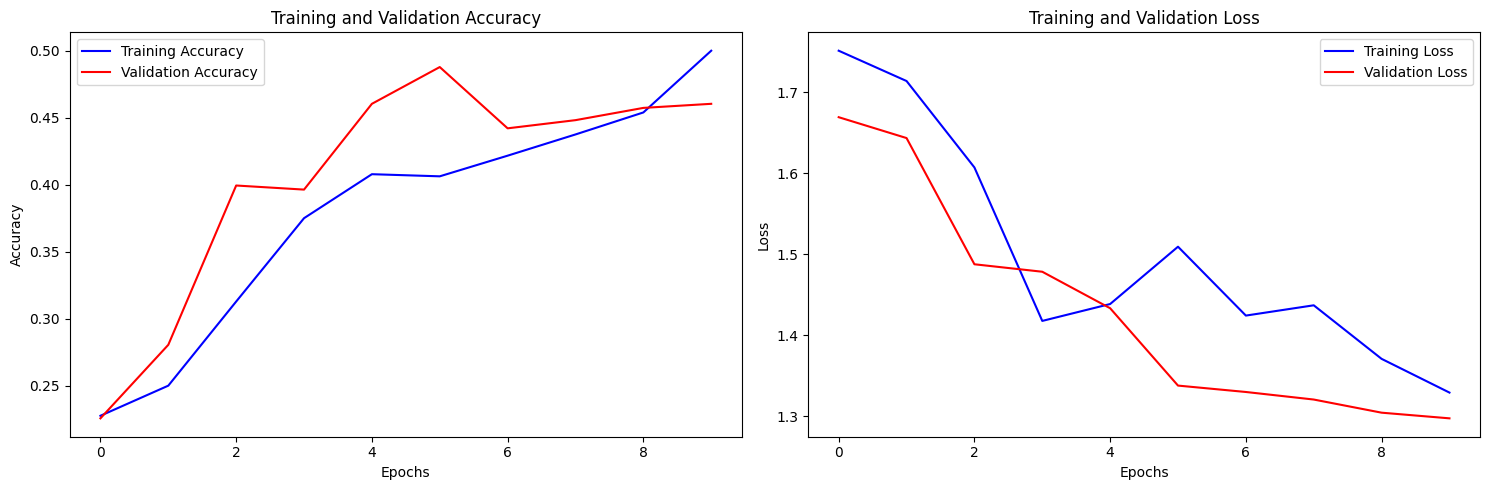

Training Accuracy: 0.5
Validation Accuracy: 0.4603658616542816
Training Loss: 1.3289453983306885
Validation Loss: 1.2971229553222656


In [4]:
#Building the CNN model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) // 32, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Saving the model
model.save('aug_cnn_model.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with L2 Regularization


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 367ms/step - accuracy: 0.2593 - loss: 2.0104 - val_accuracy: 0.3415 - val_loss: 1.6679
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2812 - loss: 1.6424 - val_accuracy: 0.3720 - val_loss: 1.6337
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 340ms/step - accuracy: 0.4027 - loss: 1.5783 - val_accuracy: 0.4177 - val_loss: 1.4594
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4062 - loss: 1.2994 - val_accuracy: 0.4329 - val_loss: 1.4491
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 351ms/step - accuracy: 0.4432 - loss: 1.4793 - val_accuracy: 0.4604 - val_loss: 1.4189
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5625 - loss: 1.3480 - val_accuracy: 0.4482 - val_loss: 1.3846
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 354ms/step - accuracy: 0.4691 - loss: 1.3819 - val_accuracy: 0.4726 - val_loss: 1.3534
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5938 - loss: 1.2326 - val_accuracy: 0.

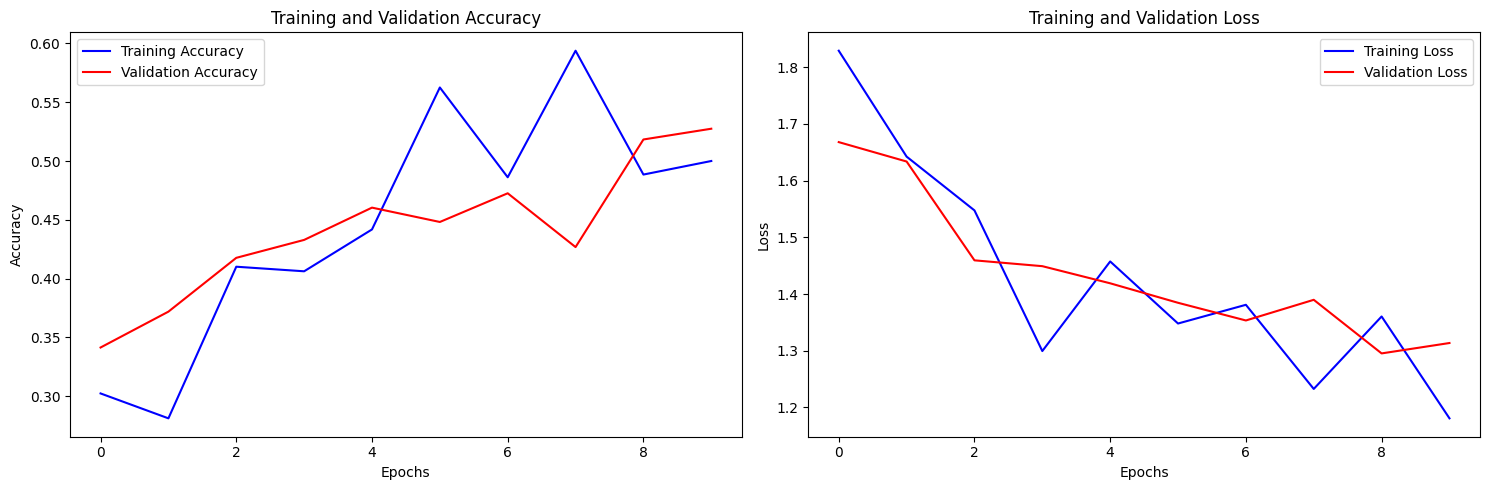

Training Accuracy: 0.5
Validation Accuracy: 0.5274389982223511
Training Loss: 1.1807756423950195
Validation Loss: 1.3136087656021118


In [5]:

from keras.regularizers import l2

model_l2 = Sequential()
model_l2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(150, 150, 3)))
model_l2.add(MaxPooling2D((2, 2)))
model_l2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(MaxPooling2D((2, 2)))
model_l2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(MaxPooling2D((2, 2)))
model_l2.add(Flatten())
model_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(6, activation='softmax'))

model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_l2.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) // 32, epochs=10, batch_size=32, validation_data=(X_val, y_val))
model_l2.save('aug_cnn_model_l2.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with L1 Regularization


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 357ms/step - accuracy: 0.1933 - loss: 15.3214 - val_accuracy: 0.1890 - val_loss: 3.2919
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1875 - loss: 3.3081 - val_accuracy: 0.2012 - val_loss: 3.2499
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 349ms/step - accuracy: 0.2553 - loss: 3.0780 - val_accuracy: 0.3476 - val_loss: 2.6793
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3750 - loss: 2.6609 - val_accuracy: 0.3537 - val_loss: 2.6944
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 356ms/step - accuracy: 0.3405 - loss: 2.6430 - val_accuracy: 0.3537 - val_loss: 2.4941
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2188 - loss: 2.6049 - val_accuracy: 0.3506 - val_loss: 2.4863
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 350ms/step - accuracy: 0.3491 - loss: 2.4611 - val_accuracy: 0.3567 - val_loss: 2.3795
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4062 - loss: 2.4207 - val_accuracy: 0

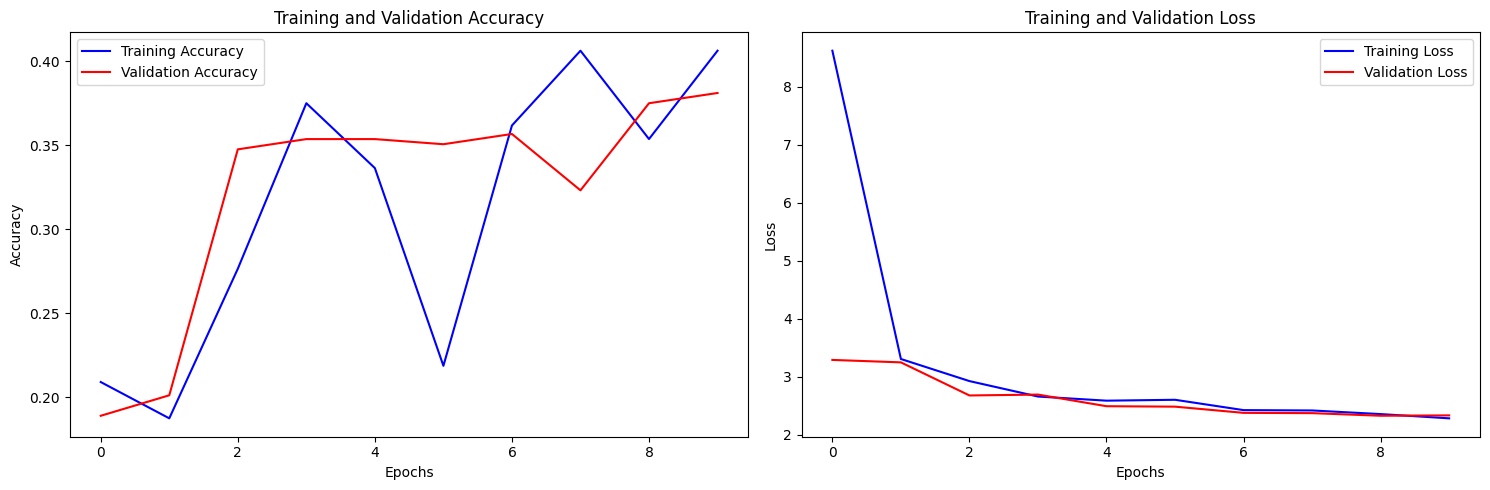

Training Accuracy: 0.40625
Validation Accuracy: 0.38109755516052246
Training Loss: 2.284912586212158
Validation Loss: 2.3357157707214355


In [6]:

from keras.regularizers import l1

model_l1 = Sequential()
model_l1.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l1(0.001), input_shape=(150, 150, 3)))
model_l1.add(MaxPooling2D((2, 2)))
model_l1.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(0.001)))
model_l1.add(MaxPooling2D((2, 2)))
model_l1.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1(0.001)))
model_l1.add(MaxPooling2D((2, 2)))
model_l1.add(Flatten())
model_l1.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))
model_l1.add(Dense(6, activation='softmax'))

model_l1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_l1.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) // 32, epochs=10, batch_size=32, validation_data=(X_val, y_val))

model_l1.save('aug_cnn_model_l1.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with Dropout Only


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 354ms/step - accuracy: 0.2626 - loss: 1.7747 - val_accuracy: 0.3933 - val_loss: 1.4929
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2812 - loss: 1.5591 - val_accuracy: 0.4085 - val_loss: 1.4728
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 338ms/step - accuracy: 0.3631 - loss: 1.4995 - val_accuracy: 0.3689 - val_loss: 1.4576
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3125 - loss: 1.4999 - val_accuracy: 0.3506 - val_loss: 1.4775
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 342ms/step - accuracy: 0.3708 - loss: 1.5285 - val_accuracy: 0.4116 - val_loss: 1.3875
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1875 - loss: 1.5741 - val_accuracy: 0.4116 - val_loss: 1.4267
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 342ms/step - accuracy: 0.4322 - loss: 1.4337 - val_accuracy: 0.4878 - val_loss: 1.3007
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4375 - loss: 1.4108 - val_accuracy: 0.

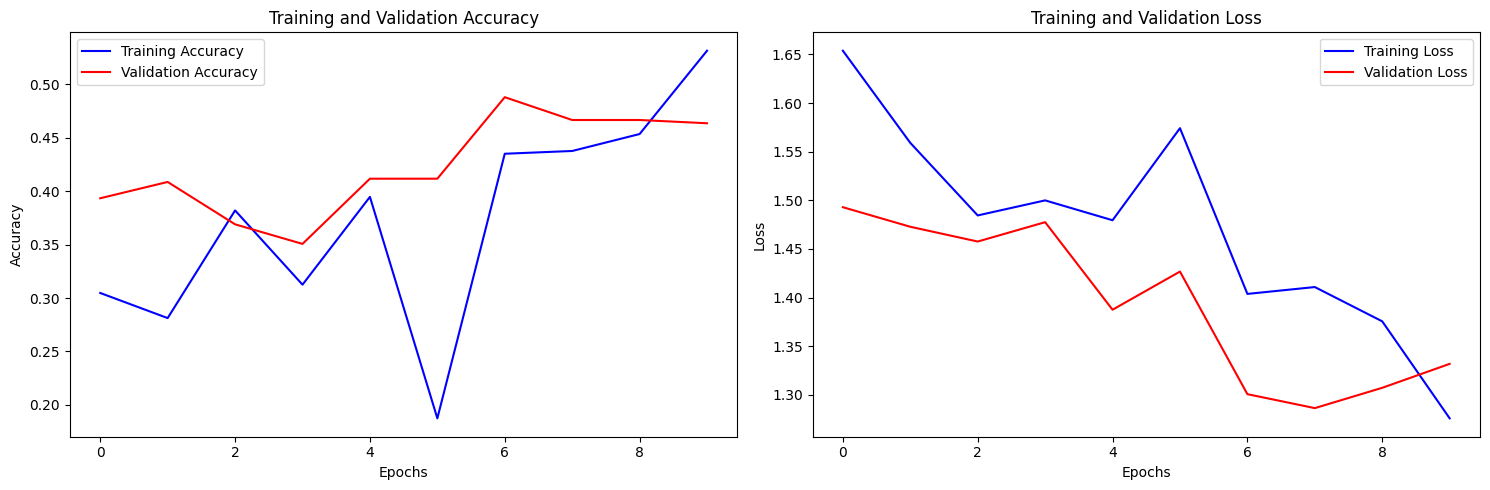

Training Accuracy: 0.53125
Validation Accuracy: 0.46341463923454285
Training Loss: 1.2758475542068481
Validation Loss: 1.3318451642990112


In [7]:

model_dropout = Sequential()
model_dropout.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_dropout.add(MaxPooling2D((2, 2)))
model_dropout.add(Conv2D(64, (3, 3), activation='relu'))
model_dropout.add(MaxPooling2D((2, 2)))
model_dropout.add(Conv2D(128, (3, 3), activation='relu'))
model_dropout.add(MaxPooling2D((2, 2)))
model_dropout.add(Flatten())
model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(6, activation='softmax'))

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_dropout.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) // 32, epochs=10, batch_size=32, validation_data=(X_val, y_val))

model_dropout.save('aug_cnn_model_dropout.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with EarlyStopping Only


Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 351ms/step - accuracy: 0.2405 - loss: 2.1643 - val_accuracy: 0.4085 - val_loss: 1.5557
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3438 - loss: 1.5399 - val_accuracy: 0.3963 - val_loss: 1.5118
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 345ms/step - accuracy: 0.3822 - loss: 1.5119 - val_accuracy: 0.4055 - val_loss: 1.4103
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4688 - loss: 1.3005 - val_accuracy: 0.4055 - val_loss: 1.4188
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 348ms/step - accuracy: 0.4483 - loss: 1.3778 - val_accuracy: 0.4421 - val_loss: 1.4597
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2812 - loss: 1.7309 - val_accuracy: 0.4482 - val_loss: 1.3764
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 345ms/step - accuracy: 0.4517 - loss: 1.3324 - val_accuracy: 0.4848 - val_loss: 1.2724
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5938 - loss: 1.3200 - val_accuracy: 0.

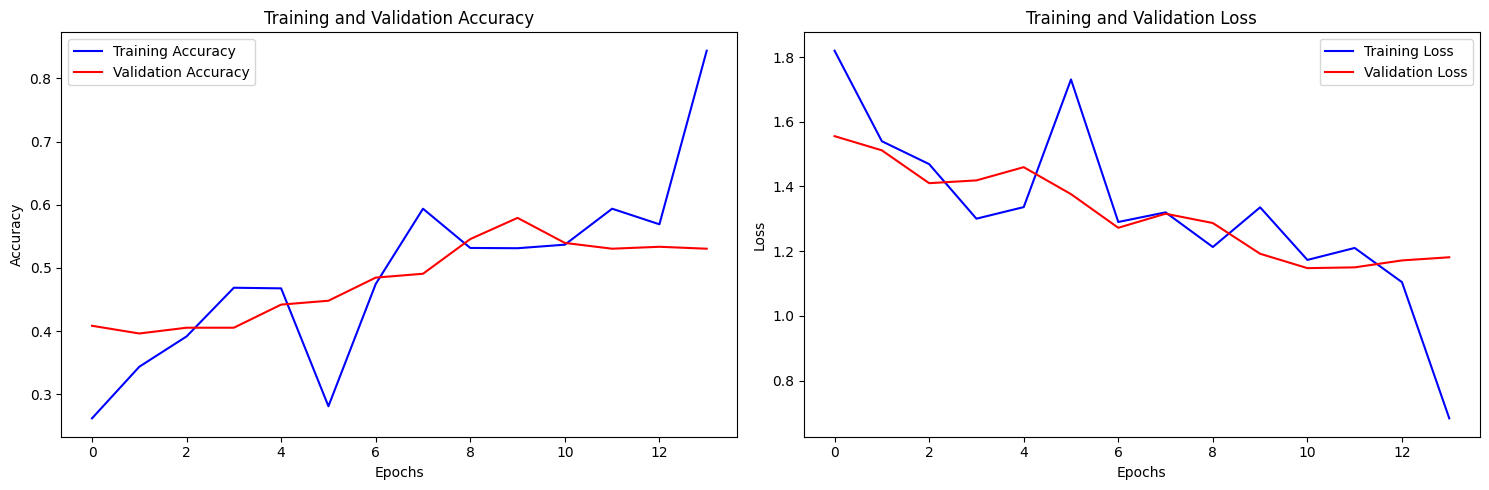

Training Accuracy: 0.84375
Validation Accuracy: 0.5304877758026123
Training Loss: 0.6832481026649475
Validation Loss: 1.1811728477478027


In [8]:

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_es = Sequential()
model_es.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_es.add(MaxPooling2D((2, 2)))
model_es.add(Conv2D(64, (3, 3), activation='relu'))
model_es.add(MaxPooling2D((2, 2)))
model_es.add(Conv2D(128, (3, 3), activation='relu'))
model_es.add(MaxPooling2D((2, 2)))
model_es.add(Flatten())
model_es.add(Dense(128, activation='relu'))
model_es.add(Dense(6, activation='softmax'))

model_es.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_es.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) // 32, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


model_es.save('aug_cnn_model_es.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with Dropout + EarlyStopping


Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 360ms/step - accuracy: 0.2646 - loss: 1.8358 - val_accuracy: 0.3720 - val_loss: 1.4893
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2500 - loss: 1.6262 - val_accuracy: 0.3933 - val_loss: 1.4865
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 343ms/step - accuracy: 0.3352 - loss: 1.5184 - val_accuracy: 0.3902 - val_loss: 1.4608
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4375 - loss: 1.4473 - val_accuracy: 0.3994 - val_loss: 1.4720
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 344ms/step - accuracy: 0.3782 - loss: 1.4299 - val_accuracy: 0.4756 - val_loss: 1.3273
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3750 - loss: 1.3240 - val_accuracy: 0.5061 - val_loss: 1.3185
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 345ms/step - accuracy: 0.4585 - loss: 1.3541 - val_accuracy: 0.4817 - val_loss: 1.2486
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3750 - loss: 1.5668 - val_accuracy: 0.

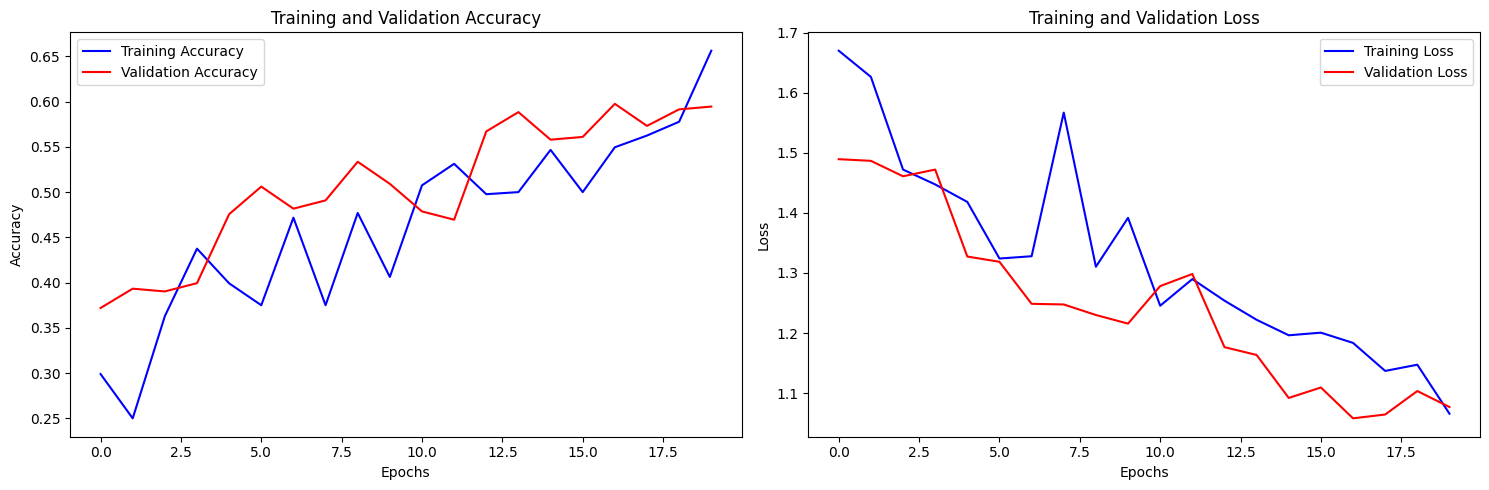

Training Accuracy: 0.65625
Validation Accuracy: 0.5945122241973877
Training Loss: 1.0658141374588013
Validation Loss: 1.0769187211990356


In [9]:

model_de = Sequential()
model_de.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_de.add(MaxPooling2D((2, 2)))
model_de.add(Conv2D(64, (3, 3), activation='relu'))
model_de.add(MaxPooling2D((2, 2)))
model_de.add(Conv2D(128, (3, 3), activation='relu'))
model_de.add(MaxPooling2D((2, 2)))
model_de.add(Flatten())
model_de.add(Dense(128, activation='relu'))
model_de.add(Dropout(0.5))
model_de.add(Dense(6, activation='softmax'))

model_de.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_de.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) // 32, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

model_de.save('aug_cnn_model_de.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Comparing with test accuracy

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    accuracy_score, roc_curve, auc,
    classification_report, confusion_matrix
)

def evaluate_model(predictions, y_true, class_names):
    # F1 Score
    f1 = f1_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("F1 Score: ", f1)

    # Precision
    precision = precision_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("Precision: ", precision)

    # Recall
    recall = recall_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("Recall: ", recall)

    # Accuracy
    accuracy = accuracy_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1))
    print("Accuracy: ", accuracy)

    # Compute ROC curve and AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1))

    # Plot ROC + Confusion Matrix in one figure
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # ROC Curve Plot
    for i in range(len(class_names)):
        axes[0].plot(fpr[i], tpr[i], label=class_names[i] + f' (AUC = {roc_auc[i]:.2f})')
    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].set_title('ROC Curve')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].legend()

    # Confusion Matrix Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=axes[1])
    axes[1].set_title('Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # Classification Report
    print(classification_report(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), target_names=class_names))



Loading the model


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5068 - loss: 1.1493
Test Loss: 1.2695363759994507
Test Accuracy: 0.4988399147987366
F1 Score:  0.47498792925175204
Precision:  0.48478252237022756
Recall:  0.4988399071925754
Accuracy:  0.4988399071925754


/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


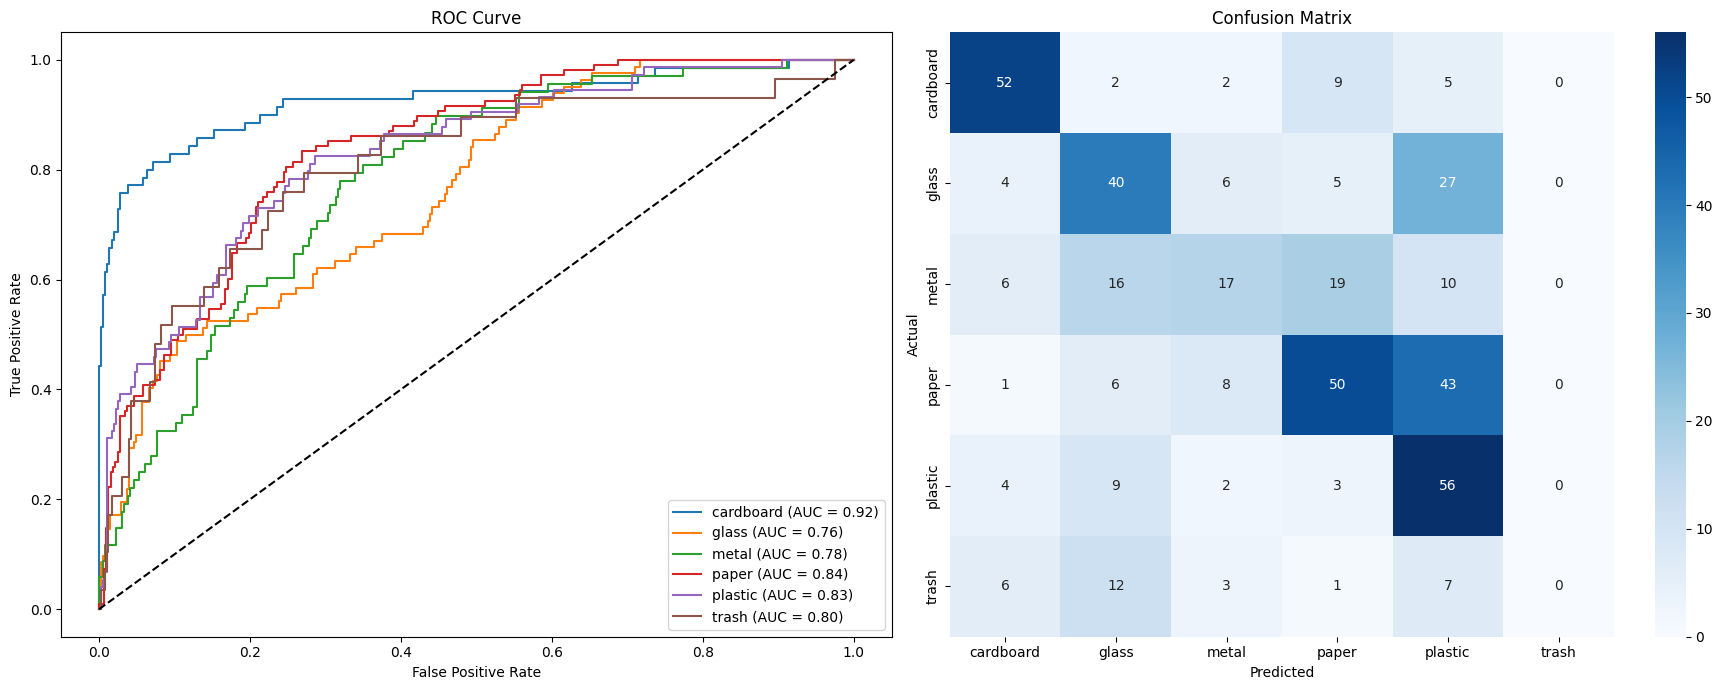

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

   cardboard       0.71      0.74      0.73        70
       glass       0.47      0.49      0.48        82
       metal       0.45      0.25      0.32        68
       paper       0.57      0.46      0.51       108
     plastic       0.38      0.76      0.50        74
       trash       0.00      0.00      0.00        29

    accuracy                           0.50       431
   macro avg       0.43      0.45      0.42       431
weighted avg       0.48      0.50      0.47       431

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4976 - loss: 1.2128
Test Loss: 1.2576717138290405
Test Accuracy: 0.5243619680404663
F1 Score:  0.5272470866191199
Precision:  0.5640479277557892
Recall:  0.5243619489559165
Accuracy:  0.5243619489559165


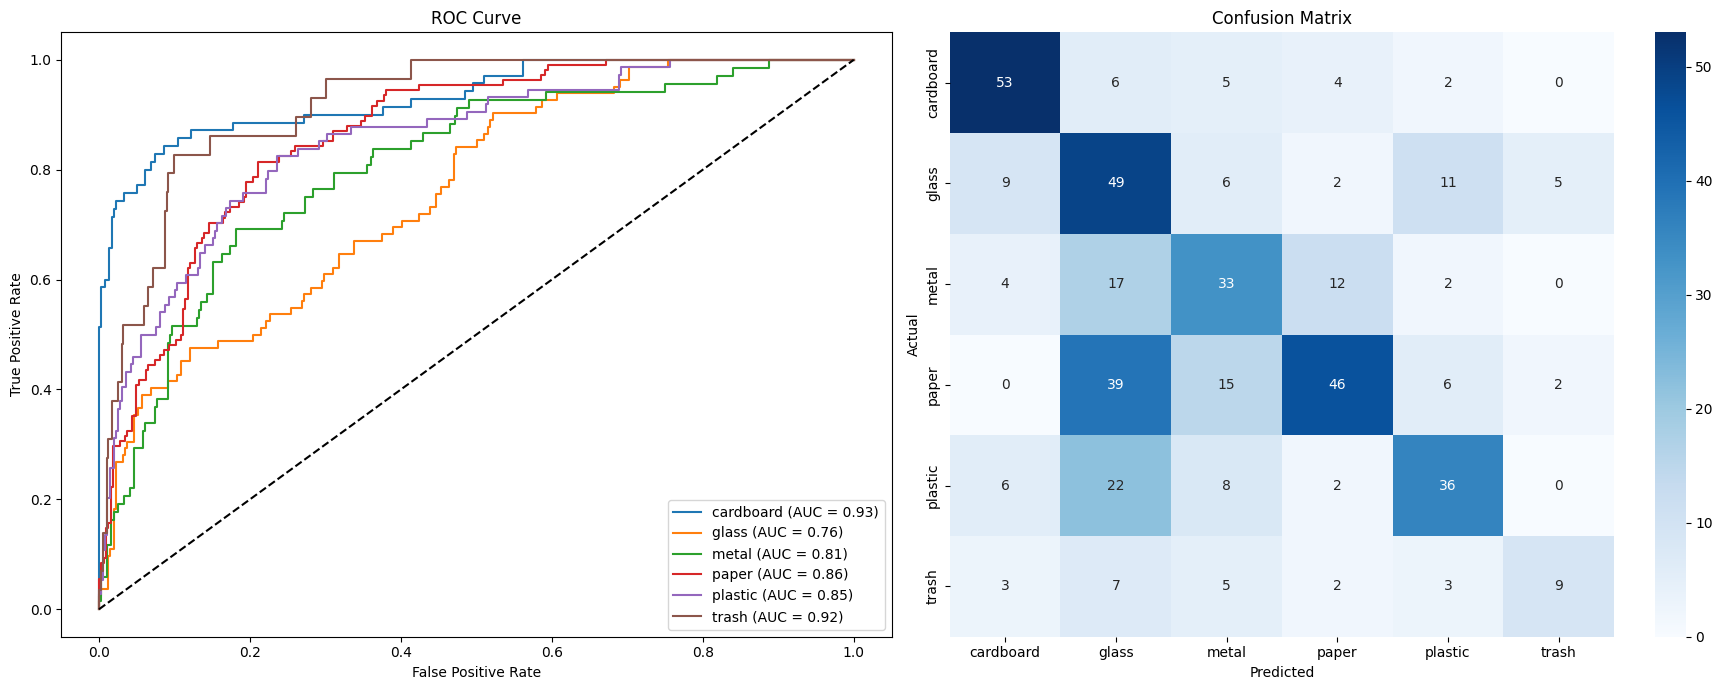

              precision    recall  f1-score   support

   cardboard       0.71      0.76      0.73        70
       glass       0.35      0.60      0.44        82
       metal       0.46      0.49      0.47        68
       paper       0.68      0.43      0.52       108
     plastic       0.60      0.49      0.54        74
       trash       0.56      0.31      0.40        29

    accuracy                           0.52       431
   macro avg       0.56      0.51      0.52       431
weighted avg       0.56      0.52      0.53       431

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.2959 - loss: 2.2941
Test Loss: 2.3225746154785156
Test Accuracy: 0.35730859637260437
F1 Score:  0.31340273104947336
Precision:  0.3215709482793856
Recall:  0.35730858468677495
Accuracy:  0.35730858468677495


/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


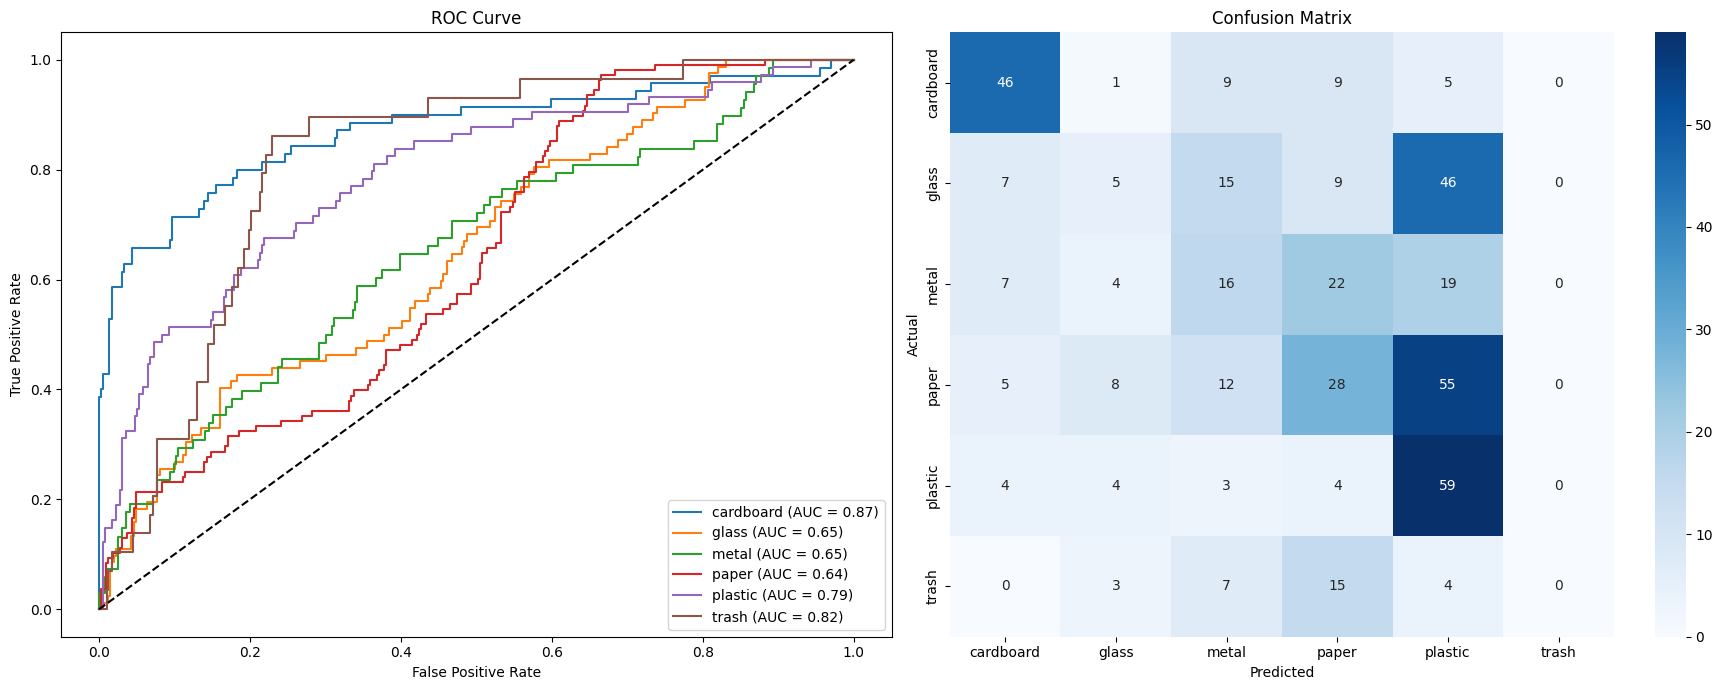

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

   cardboard       0.67      0.66      0.66        70
       glass       0.20      0.06      0.09        82
       metal       0.26      0.24      0.25        68
       paper       0.32      0.26      0.29       108
     plastic       0.31      0.80      0.45        74
       trash       0.00      0.00      0.00        29

    accuracy                           0.36       431
   macro avg       0.29      0.33      0.29       431
weighted avg       0.32      0.36      0.31       431

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.4970 - loss: 1.1865
Test Loss: 1.300795078277588
Test Accuracy: 0.45475637912750244
F1 Score:  0.440185207454203
Precision:  0.43570406291248354
Recall:  0.4547563805104408
Accuracy:  0.4547563805104408


/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


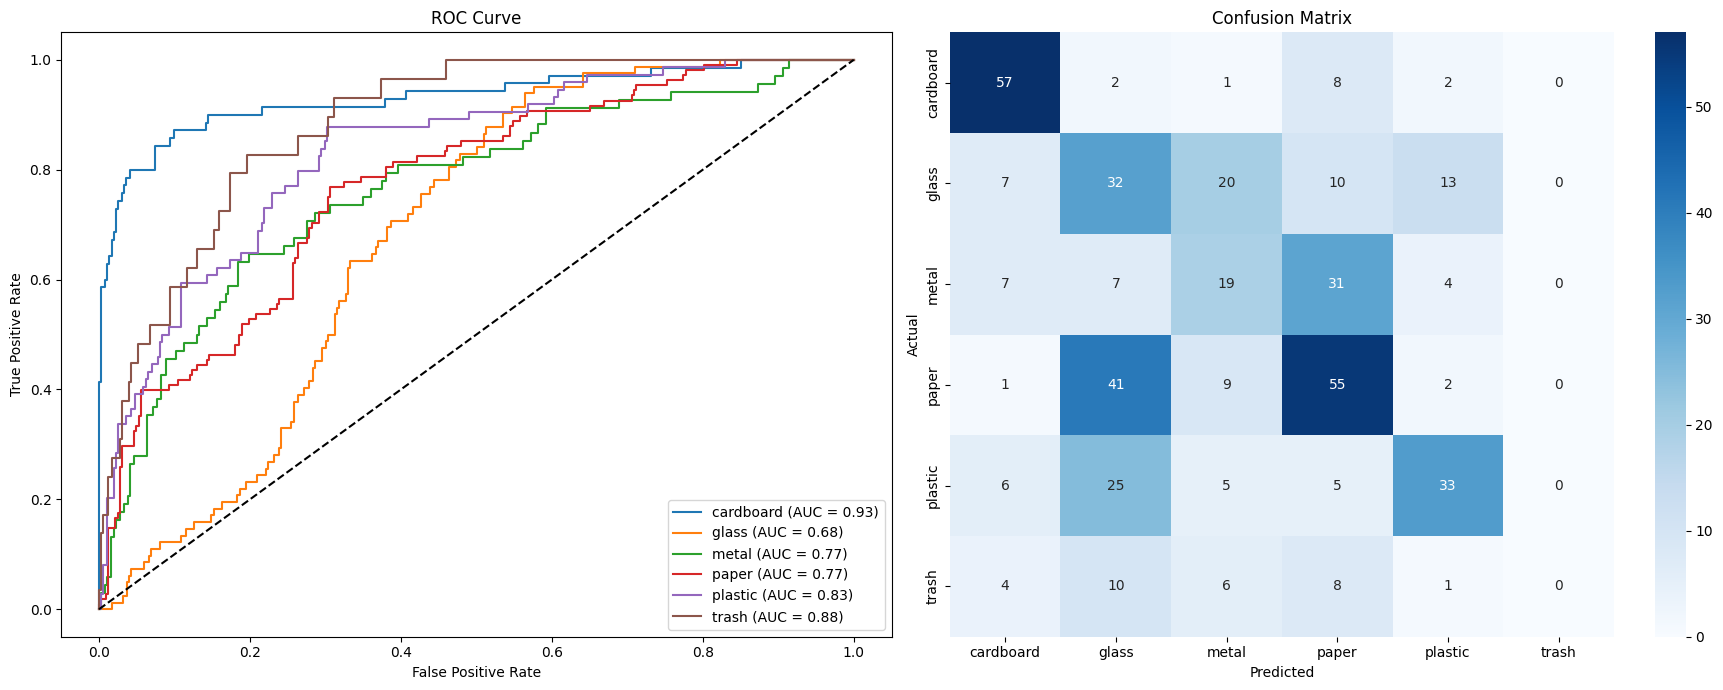

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

   cardboard       0.70      0.81      0.75        70
       glass       0.27      0.39      0.32        82
       metal       0.32      0.28      0.30        68
       paper       0.47      0.51      0.49       108
     plastic       0.60      0.45      0.51        74
       trash       0.00      0.00      0.00        29

    accuracy                           0.45       431
   macro avg       0.39      0.41      0.39       431
weighted avg       0.44      0.45      0.44       431

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7165 - loss: 0.8767
Test Loss: 1.0962011814117432
Test Accuracy: 0.6009280681610107
F1 Score:  0.5823991917003201
Precision:  0.6099177022412844
Recall:  0.6009280742459396
Accuracy:  0.6009280742459396


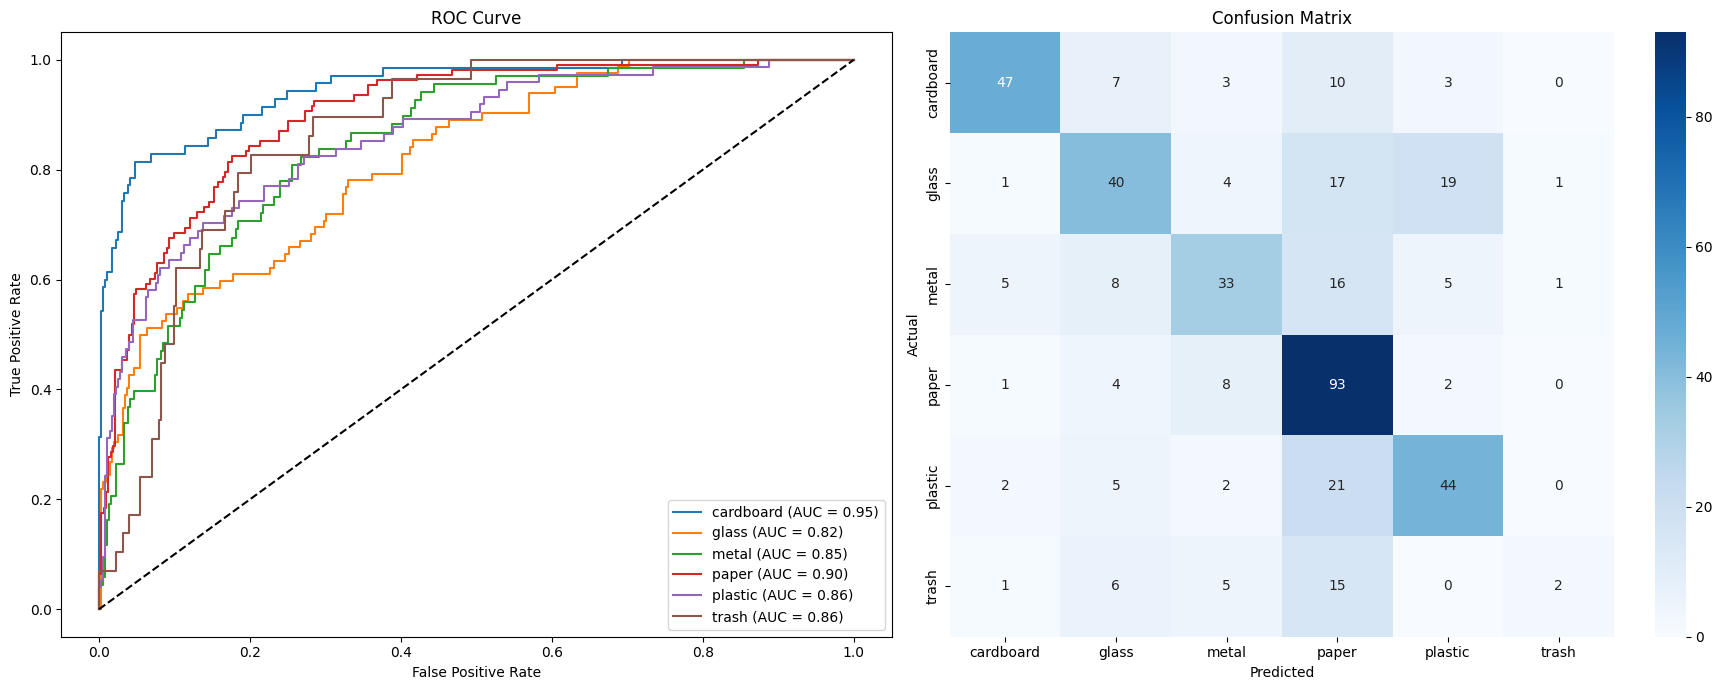

              precision    recall  f1-score   support

   cardboard       0.82      0.67      0.74        70
       glass       0.57      0.49      0.53        82
       metal       0.60      0.49      0.54        68
       paper       0.54      0.86      0.66       108
     plastic       0.60      0.59      0.60        74
       trash       0.50      0.07      0.12        29

    accuracy                           0.60       431
   macro avg       0.61      0.53      0.53       431
weighted avg       0.61      0.60      0.58       431

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7090 - loss: 0.8487
Test Loss: 1.0249648094177246
Test Accuracy: 0.6264501214027405
F1 Score:  0.6077035593897198
Precision:  0.6363439275531025
Recall:  0.6264501160092807
Accuracy:  0.6264501160092807


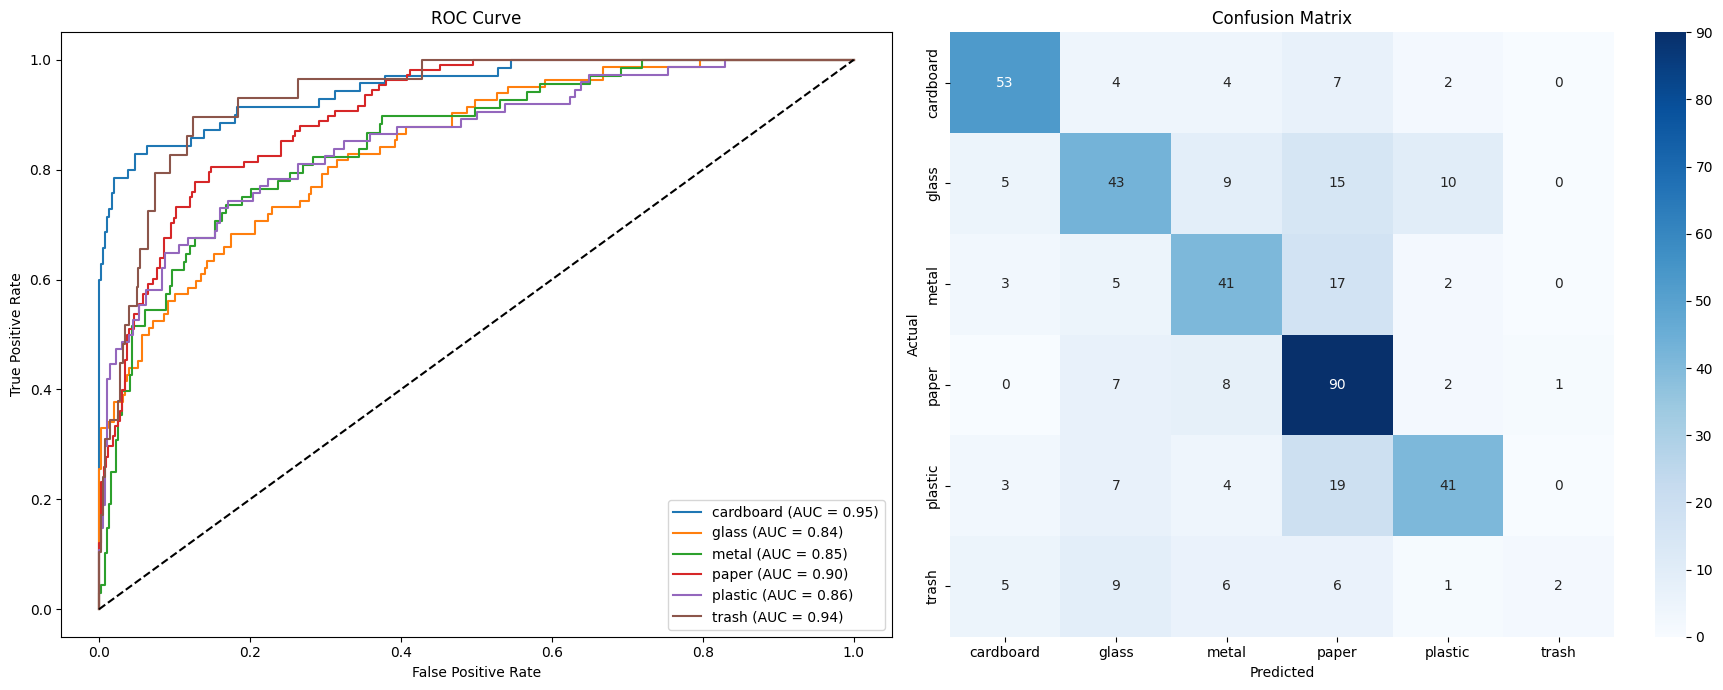

              precision    recall  f1-score   support

   cardboard       0.77      0.76      0.76        70
       glass       0.57      0.52      0.55        82
       metal       0.57      0.60      0.59        68
       paper       0.58      0.83      0.69       108
     plastic       0.71      0.55      0.62        74
       trash       0.67      0.07      0.12        29

    accuracy                           0.63       431
   macro avg       0.64      0.56      0.55       431
weighted avg       0.64      0.63      0.61       431



In [18]:
# Loading the model ADAM
from keras.models import load_model

print("\nLoading the model")
model = load_model('aug_cnn_model.h5')
model_l2 = load_model('aug_cnn_model_l2.h5')
model_l1 = load_model('aug_cnn_model_l1.h5')
model_dropout = load_model('aug_cnn_model_dropout.h5')
model_es = load_model('aug_cnn_model_es.h5')
model_de = load_model('aug_cnn_model_de.h5')

for m in [model, model_l2, model_l1, model_dropout, model_es, model_de]:
    predictions = m.predict(X_test)
    loss, accuracy = m.evaluate(X_test, y_test)
    print('Test Loss:', loss)
    print('Test Accuracy:', accuracy)
    evaluate_model(predictions, y_test, classes_names)


In [ ]:
# # Model Evaluation

# # f1 score, precision, recall, accuracy, confusion matrix, classification report, and ROC curve

# from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc

# # F1 Score
# f1 = f1_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
# print("F1 Score: ", f1)

# # Precision
# precision = precision_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
# print("Precision: ", precision)

# # Recall
# recall = recall_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
# print("Recall: ", recall)

# # Accuracy
# accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))
# print("Accuracy: ", accuracy)

# # ROC Curve
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# for i in range(6):
#     fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], predictions[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# plt.figure(figsize=(10, 10))

# for i in range(6):
#     plt.plot(fpr[i], tpr[i], label=classes_names[i] + ' (AUC = ' + str(roc_auc[i]) + ')')

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.title('ROC Curve')
# plt.show()

# # Classification Report
# from sklearn.metrics import classification_report

# print(classification_report(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), target_names=classes_names))

# # Confusion Matrix
# from sklearn.metrics import confusion_matrix

# confusion_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))

# plt.figure(figsize=(10, 10))
# sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_names, yticklabels=classes_names)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


In [ ]:
# Function to displaying random predictions from the dataset with their images and predictions

def display_random_predictions(X, y, predictions, classes_names, number_of_predictions=5):
    plt.figure(figsize=(15, 20))

    for class_name in classes_names:
        for i in range(number_of_predictions):
            index = np.random.choice(np.where(y == class_name)[0])
            plt.subplot(len(classes_names), number_of_predictions, number_of_predictions * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[index])
            plt.title("Actual: " + class_name + "\nPredicted: " + label_encoder.classes_[np.argmax(predictions[index])])
            plt.axis('off')
    
    plt.show()

display_random_predictions(X_test, y_test, predictions, classes_names)

ValueError: 'a' cannot be empty unless no samples are taken

<Figure size 1500x2000 with 0 Axes>

: 